# Assignment 2, Q1
Sagrika Nagar (20171204)

# Q1 Part 1

In [1]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np


Min Val and Max Val: 100 and 200


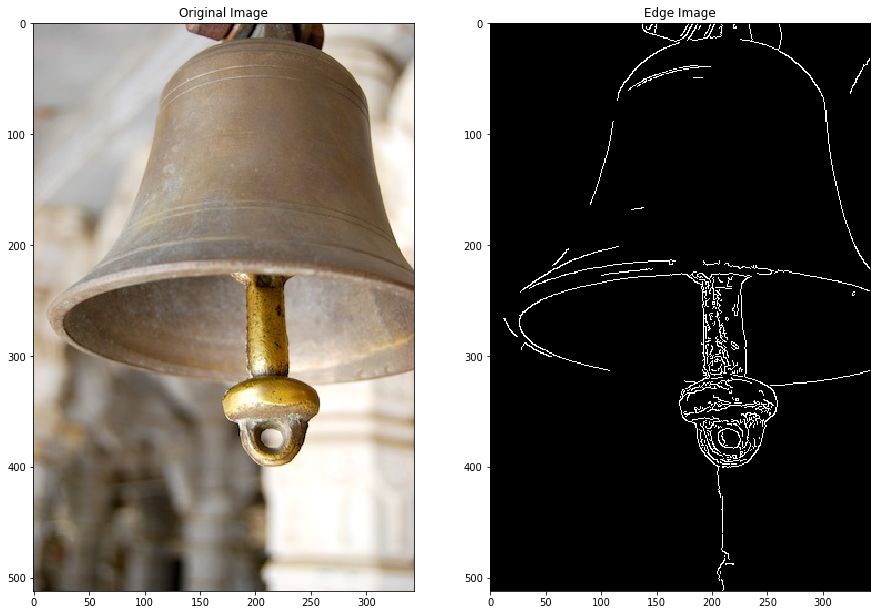

In [19]:
img = cv2.imread('bell.jpg')
im = cv2.imread('bell.jpg', 0)
edges = cv2.Canny(im, 100, 200)

print("Min Val and Max Val: 100 and 200")
f, axs = plt.subplots(1,2,figsize=(15,15))

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.show()

Min Val and Max Val: 80 and 200


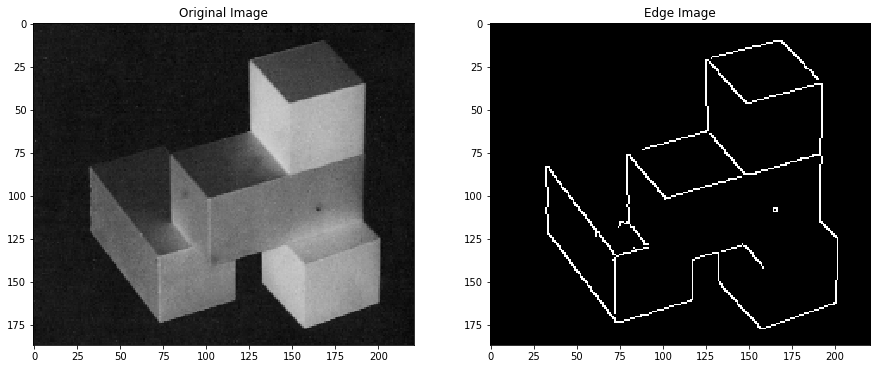

In [20]:
img = cv2.imread('cubes.png')
im = cv2.imread('cubes.png', 0)
edges = cv2.Canny(im, 80, 200)

print("Min Val and Max Val: 80 and 200")
f, axs = plt.subplots(figsize=(15,15))

plt.subplot(121),plt.imshow(img)
plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.show()
# 0.1, 0.9

# Q1 Part 2

In [2]:
def convolve(im, kernel):
    h, w = im.shape
    h_k, w_k = kernel.shape
    kernel = np.flip(kernel, 1)

    output = np.zeros(im.shape)
    im_padded = np.zeros((h + 2, w + 2))   
    im_padded[1:-1, 1:-1] = im
    
    for i in range(1,h): 
        for j in range(1,w):
            output[i,j]=(kernel*im_padded[i-1:i+2,j-1:j+2]).sum() 
            
    return output

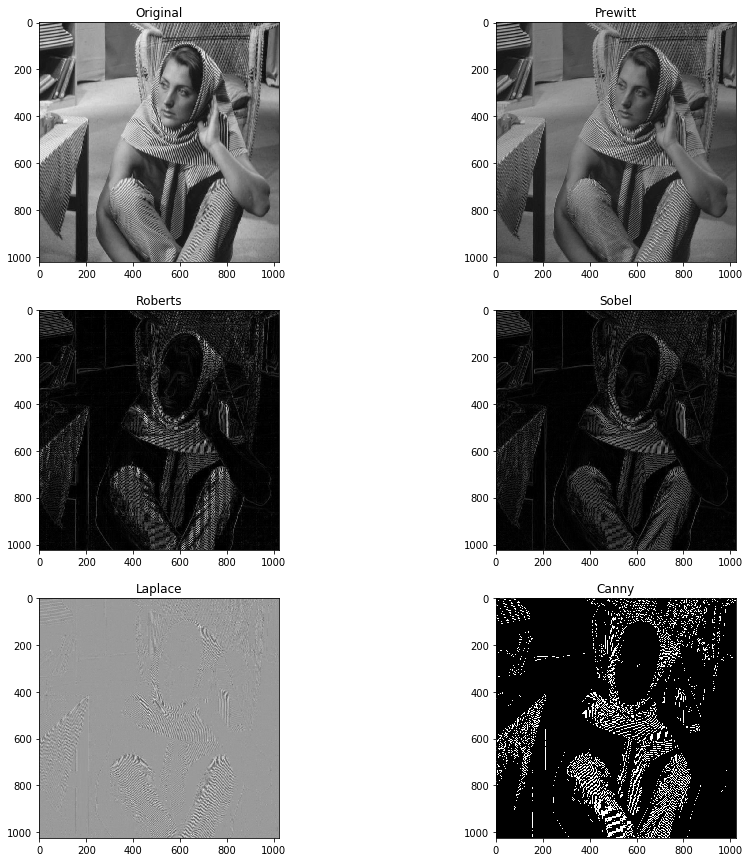

In [3]:
img = cv2.imread("barbara.jpg", 0)
roberts_x = np.array( [[ 0, 0, 0 ],[ 0, 0, 1 ], [0,-1, 0 ]] )
roberts_y = np.array( [[ 0, 0, 0 ],[ 0, 1, 0 ], [ 0, 0,-1 ]] )

prewitt_x = np.array( [[ -1, 0, 1 ],[ -1, 0, 1 ], [-1,0, 1 ]] )
prewitt_y = np.array( [[ 1, 1, 1 ],[ 0, 0, 0], [1, -1, -1 ]] )

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

laplace = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

filter_x = [prewitt_x, roberts_x, sobel_x]
filter_y = [prewitt_y, roberts_y, sobel_y]

output_image = []

edges = cv2.Canny(img, 80, 200)

for i in range(3):
    vertical = convolve(img, filter_x[i] )
    horizontal = convolve(img, filter_y[i] )
    output_image.append(np.sqrt( np.square(horizontal) + np.square(vertical)))

output_image.append(convolve(img, laplace))

f, axs = plt.subplots(figsize=(15,15))

plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(3,2,2)
plt.imshow(output_image[0],cmap = 'gray')
plt.title("Prewitt")

plt.subplot(3,2,3)
plt.imshow(output_image[1],cmap = 'gray')
plt.title("Roberts")

plt.subplot(3,2,4)
plt.imshow(output_image[2],cmap = 'gray')
plt.title("Sobel")

plt.subplot(3, 2, 5)
plt.imshow(output_image[3], cmap = 'gray')
plt.title("Laplace")

plt.subplot(3, 2, 6)
plt.imshow(edges, cmap = 'gray')
plt.title("Canny")
plt.show()


# Q1 Part 3

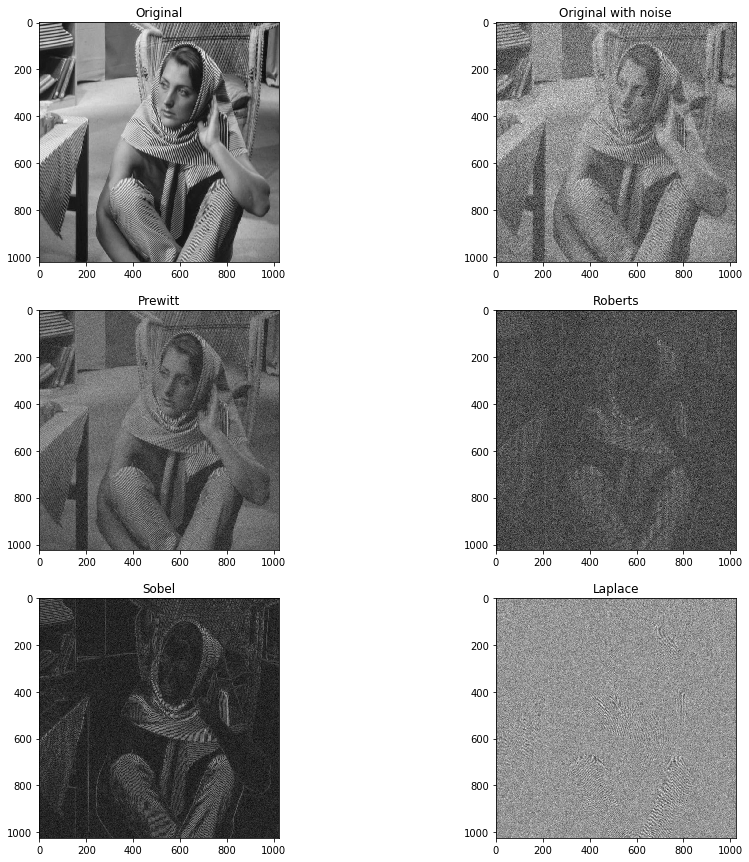

In [25]:
def gaussian(im):
    mean = 0
    var = 2
    sigma = var ** 5
    w, h = im.shape
    gaussian = np.random.normal(mean, sigma, (w, h))

    noisy_image = np.zeros(im.shape, np.float32)

    noisy_image = im + gaussian
    cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

f, axs = plt.subplots(figsize=(15,15))

n1 = gaussian(img)
n2 = gaussian(output_image[0]) 
n3 = gaussian(output_image[1])
n4 = gaussian(output_image[2]) 
n5 = gaussian(output_image[3])
plt.subplot(321), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(322), plt.imshow(n1, cmap='gray'), plt.title("Original with noise")
plt.subplot(323), plt.imshow(n2, cmap='gray'), plt.title("Prewitt")
plt.subplot(324), plt.imshow(n3, cmap='gray'), plt.title("Roberts")
plt.subplot(325), plt.imshow(n4, cmap='gray'), plt.title("Sobel")
plt.subplot(326), plt.imshow(n5, cmap='gray'), plt.title("Laplace")

plt.show()
    